# Vehicle Classification
## About the Notebook

I have approached this case study the following way
- Started with the __data visualization, EDA__ and then worked on the __Data Imputation__ with the help of sklearn Imputer
- In modelling I first build __SVM with the original data__ (All 18 Independent variables). 
- Then in __dimensionality reduction used PCA__ to reduce the Independent variables
- Build __SVM classifier based on PCA reduced dimension__ and compared the __accuracy, precision, recall, F1 scores__ with the classifier built on the original data

## About data:
The data has __18 independent variables (all continuous variables) and 1 Target variable__ which has 3 values namely Car, Bus and Van

## Steps and Tasks:
1. Data pre-processing – Perform all the necessary preprocessing on the data ready to be fed to an Unsupervised algorithm 
2. Understanding the attributes - Find relationship between different attributes (Independent variables) and choose carefully which all attributes have to be a part of the analysis and why
3. Split the data into train and test (Suggestion: specify “random state” if you are using train_test_split from Sklearn) 
4. Train a Support vector machine using the train set and get the accuracy on the test set 
5. Perform K-fold cross validation and get the cross validation score of the model 
6. Use PCA from Scikit learn, extract Principal Components that capture about 95% of the variance in the data 
7. Repeat steps 3,4 and 5 but this time, use Principal Components instead of the original data. And the accuracy score should be on the same rows of test data that were used earlier. (hint: set the same random state)
8. Compare the accuracy scores and cross validation scores of Support vector machines – one trained using raw data and the other using Principal Components, and mention your findings 

In [1]:
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Imputer
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn import metrics
from scipy.stats import zscore
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from plotly.subplots import make_subplots
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Read the vehicle data
veh = pd.read_csv("C:/Users/tt002/Downloads/vehicle.csv")
veh.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            183   bus

In [3]:
veh.info() # gives infomarion on data type and total non null data in the column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

In [4]:
veh.describe() # shows the descriptive statistics of the data set

compactness  circularity  distance_circularity  radius_ratio  \
count   846.000000   841.000000            842.000000    840.000000   
mean     93.678487    44.828775             82.110451    168.888095   
std       8.234474     6.152172             15.778292     33.520198   
min      73.000000    33.000000             40.000000    104.000000   
25%      87.000000    40.000000             70.000000    141.000000   
50%      93.000000    44.000000             80.000000    167.000000   
75%     100.000000    49.000000             98.000000    195.000000   
max     119.000000    59.000000            112.000000    333.000000   

       pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
count            844.000000               846.000000     845.000000   
mean              61.678910                 8.567376     168.901775   
std                7.891463                 4.601217      33.214848   
min               47.000000                 2.000000     112.000000   
25%               57.000000                 7.000000     147.000000   
50%               61.000000                 8.000000     157.000000   
75%               65.000000                10.000000     198.000000   
max              138.000000                55.000000     265.000000   

       elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
count     845.000000              843.000000                 846.000000   
mean       40.933728               20.582444                 147.998818   
std         7.816186                2.592933                  14.515652   
min        26.000000               17.000000                 118.000000   
25%        33.000000               19.000000                 137.000000   
50%        43.000000               20.000000                 146.000000   
75%        46.000000               23.000000                 159.000000   
max        61.000000               29.000000                 188.000000   

       scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
count       843.000000         844.000000                 844.000000   
mean        188.631079         439.494076                 174.709716   
std          31.411004         176.666903                  32.584808   
min         130.000000         184.000000                 109.000000   
25%         167.000000         318.000000                 149.000000   
50%         179.000000         363.500000                 173.500000   
75%         217.000000         587.000000                 198.000000   
max         320.000000        1018.000000                 268.000000   

       scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
count                   842.000000      840.000000        845.000000   
mean                     72.447743        6.364286         12.602367   
std                       7.486190        4.920649          8.936081   
min                      59.000000        0.000000          0.000000   
25%                      67.000000        2.000000          5.000000   
50%                      71.500000        6.000000         11.000000   
75%                      75.000000        9.000000         19.000000   
max                     135.000000       22.000000         41.000000   

       skewness_about.2  hollows_ratio  
count        845.000000     846.000000  
mean         188.919527     195.632388  
std            6.155809       7.438797  
min          176.000000     181.000000  
25%          184.000000     190.250000  
50%          188.000000     197.000000  
75%          193.000000     201.000000  
max          206.000000     211.000000

### Insights
- 4 variables namely distance_circularity, max.length_aspect_ratio skewness_about1 and Scaled_variance has __very high Standard deviation__ compared to other variables. This show the __spread of these variables are high and very diversified__


## 1. Data Preprocessing

In [5]:
veh.isna().sum() # Check for missing values in each column

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [6]:
# fill missing values with median column values
X = veh.drop('class',axis=1)     # Predictor feature columns (18 X m)
Y = veh['class']   # Predicted class (van, bus, car) (1 X m)
imp = Imputer(missing_values='NaN', strategy='median', axis=0)  # override default behavior to replace Nan with Median
imp_x = pd.DataFrame(imp.fit_transform(X),columns = list(X))



In [7]:
imp_x.isna().sum() # Check if all the missing values are imputed

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
dtype: int64

## 2. Understanding the attributes

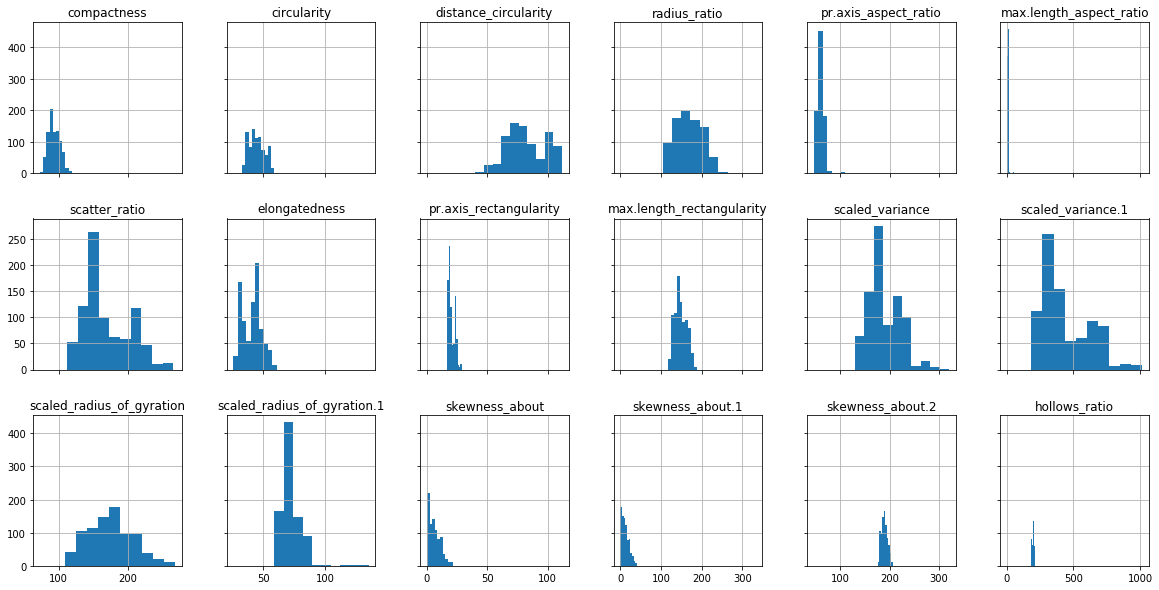

In [8]:
# shape of the independent variables
fig, ax = plt.subplots(3, 6, sharex='col', sharey='row',figsize = (20,10))
m=0
for i in range(3):
    for j in range(6):
        imp_x.hist(column = imp_x.columns[m],ax=ax[i,j])
        m+=1

### Insights
- 3 independent variables have __double peak (bimodal)__ namely Distance circularity, elongatedness and Scatter ratio, meaning there could be __overlapping of classes__ in these dimensions
- 3 independent variables are __right skewed namely__ Scaled variance 1 & 2, scaled radius of gyration_1, meaning there are extreme values on higher side which could __possible be outlier__ which can be confirmed with a Box plot


<Figure size 3600x3600 with 0 Axes>

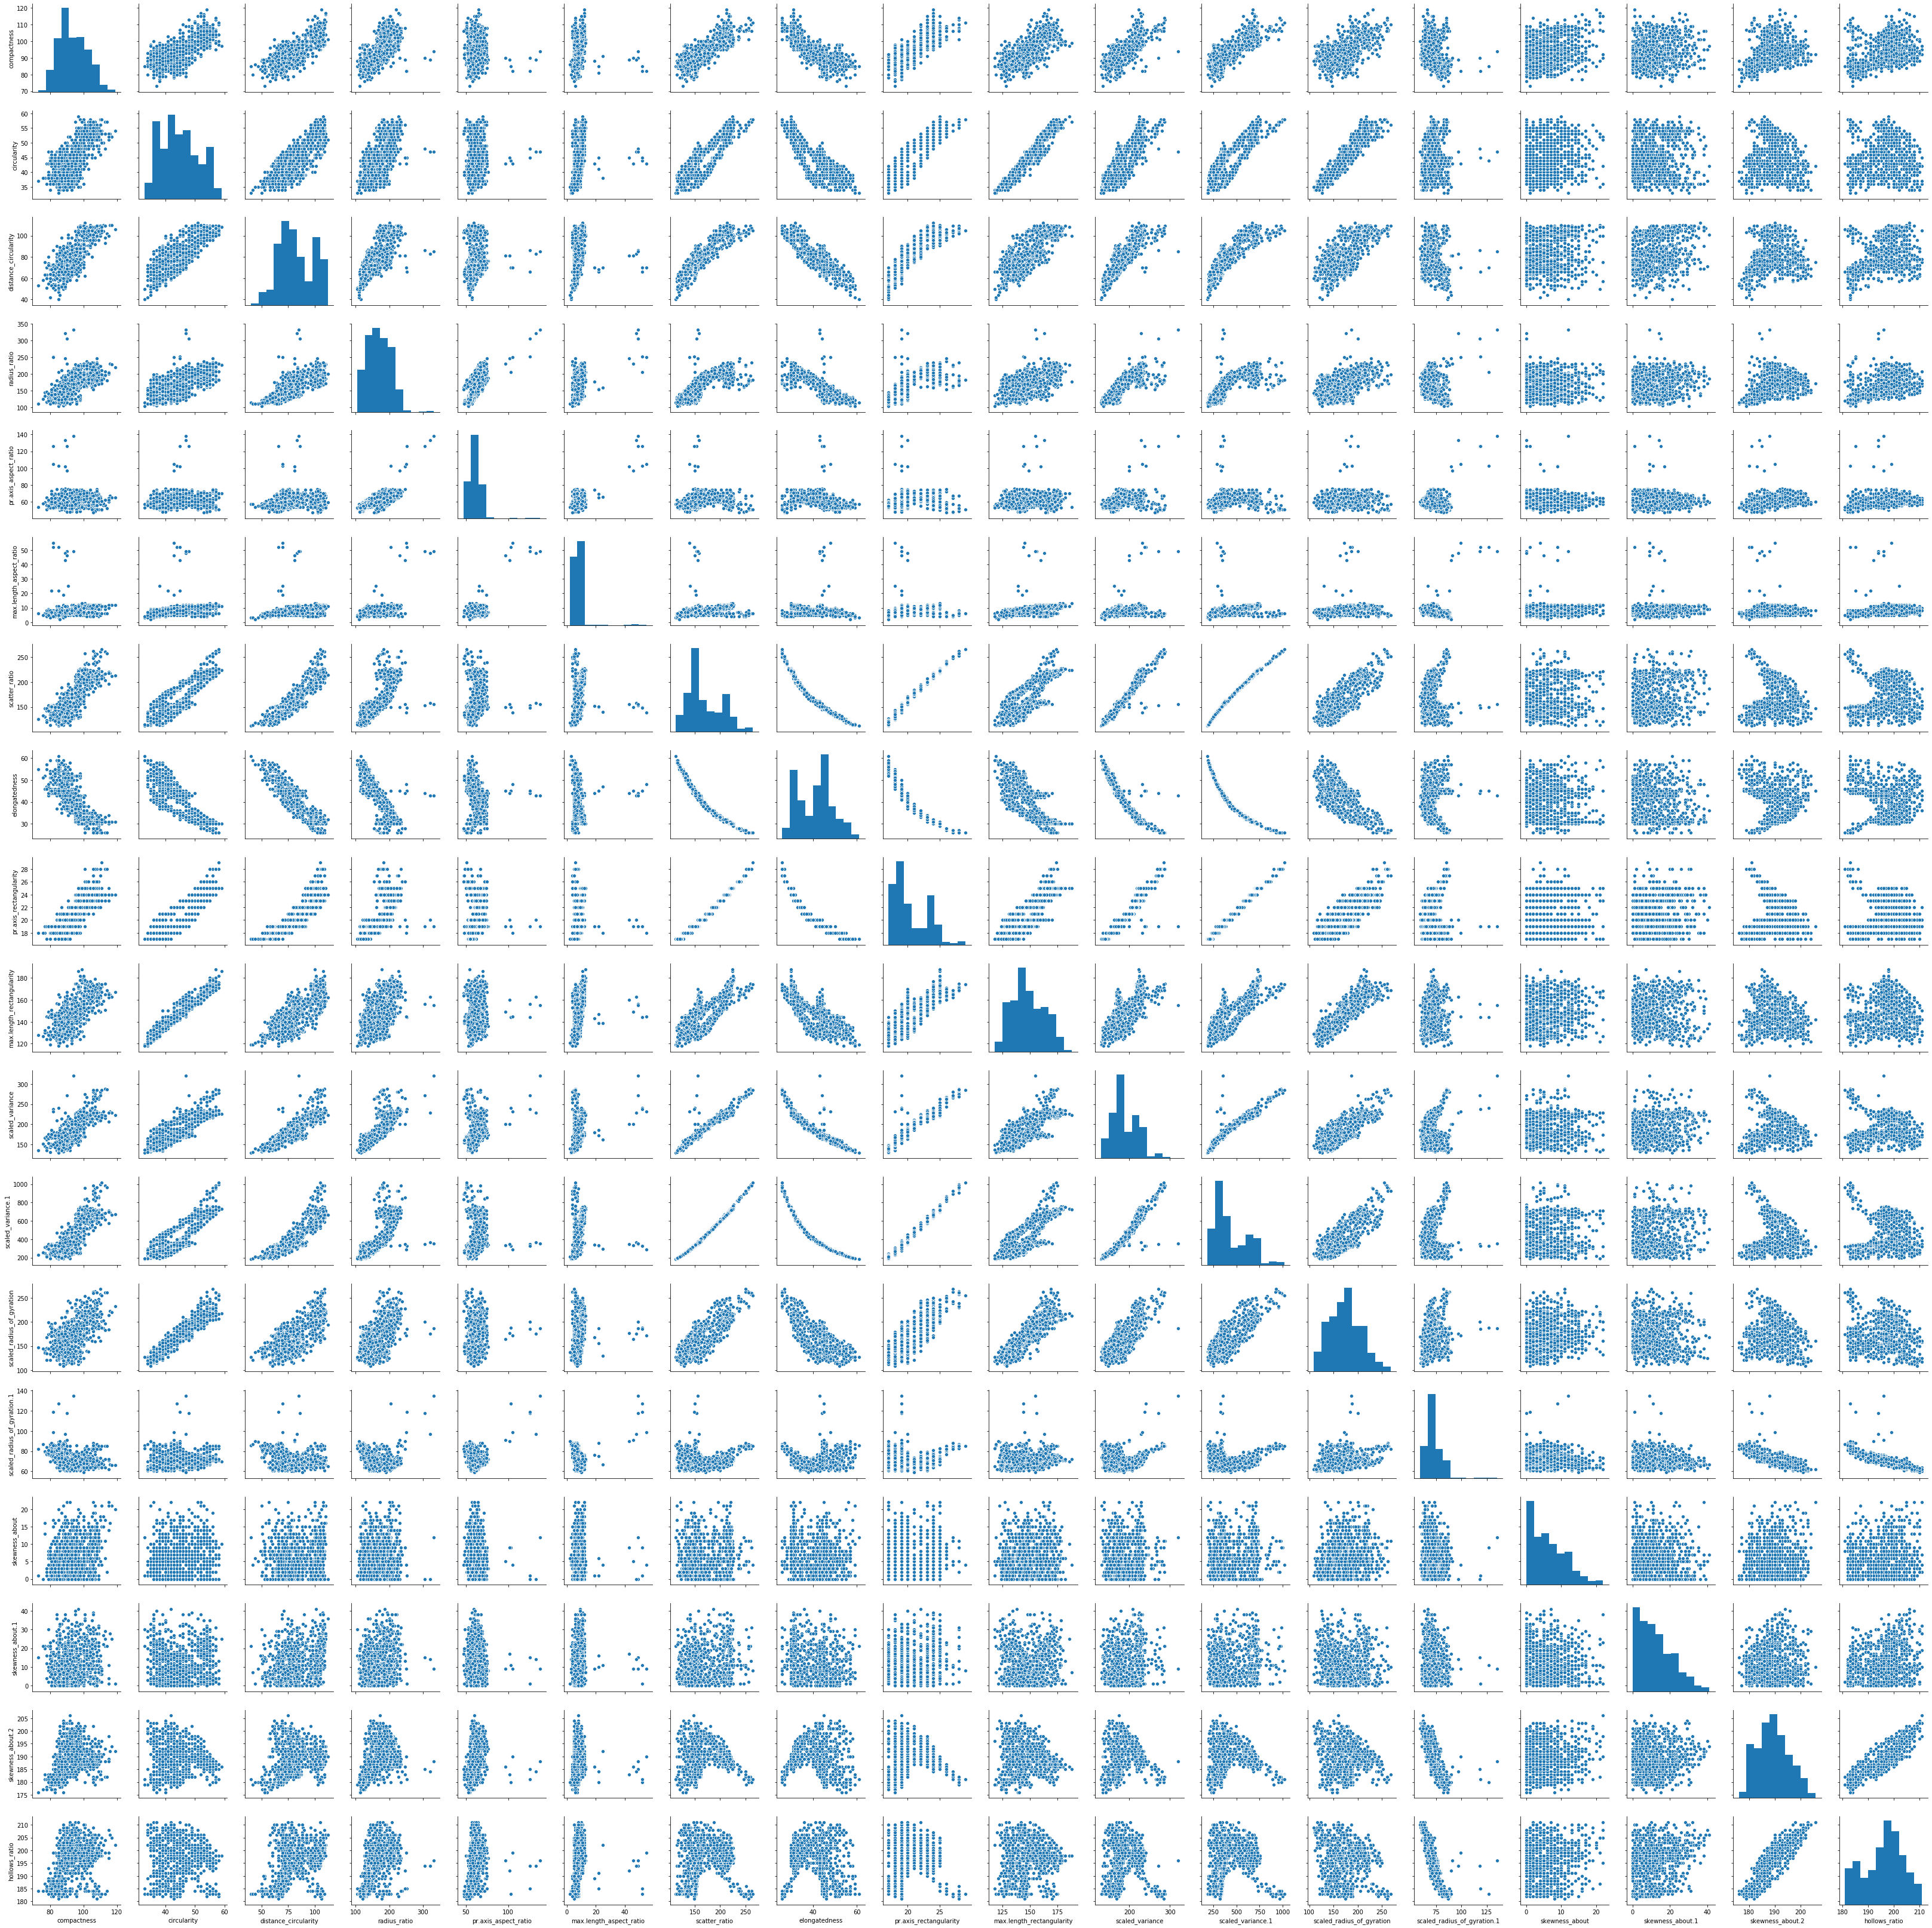

In [9]:
# Pair plot with all the variables
plt.figure(figsize=(50,50))
sns.pairplot(veh)

### Insights
- There is a very high multicolinearity in the dataset except of 6 - 7 variables(out of 18) namely (skewness_about, about1,2, hollow ratio, pr axis, maximum length aspect) all other variables are one or the other point correlated with any of the other variables


## 3. Spliting the dataset into training and test set

In [10]:
x_train, x_test, y_train, y_test = train_test_split(imp_x, Y, test_size=0.3, random_state = 2)# 3. spliting the data into training and test set

## 4.Training the SVM on the training data set

In [11]:
# fitting SVM model on training data
clf = svm.SVC(gamma=0.025, C=3) 
mod = clf.fit(x_train, y_train)

In [12]:
y_pred = clf.predict(x_test) # predicting SVM model on test data
print("The model accuracy in training set:{0:.4f}".format(mod.score(x_train, y_train)))
print("Model Accuracy in Test set: {0:.4f}".format(metrics.accuracy_score(y_test, y_pred)))

The model accuracy in training set:1.0000
Model Accuracy in Test set: 0.5118


### Insights
- This is a classical case of high variance or overfitting. The model has 100% accuracy in training set but performs as equivalent to a random guess in testing set. In this the model the SVM classifier used the default Radial base kernel, lets try out with polynomial kernel and see how it works

In [13]:
clf_poly = svm.SVC(gamma=0.025, C=3, kernel = 'poly') # changed the default rbf to polynomial kernal
mod = clf_poly.fit(x_train, y_train)

In [14]:
y_pred = clf_poly.predict(x_test)
print("The model accuracy in training set:{0:.4f}".format(mod.score(x_train, y_train)))
print("Model Accuracy in Test set: {0:.4f}".format(metrics.accuracy_score(y_test, y_pred)))

The model accuracy in training set:1.0000
Model Accuracy in Test set: 0.9685


### Insights
- The change kernal for classification has dramatically improved the accuracy from a near random accuracy of 51% to around 97% which is excellent

## 5. Perform Kfold crossvalidation

In [15]:
# Kfold Cross Validation
kfold = KFold(n_splits= 10, random_state=2)
model = svm.SVC(gamma=0.025, C=3, kernel = 'poly') 
results = cross_val_score(model, imp_x, Y, cv=kfold)
print(results)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

[0.91764706 0.95294118 0.94117647 0.98823529 1.         0.92941176
 0.97619048 0.95238095 0.97619048 0.96428571]
Accuracy: 95.985% (2.476%)


### Insights
- The Average cross validation accuracy of 10 test sets are around 96% with a standar deviation of 2.5%. Hence we can certain that our model will perform at minimum 93% + accuracy when deployed in production

## 6. Dimensional reduction with Principal Component Analysis to caputre 95% variation

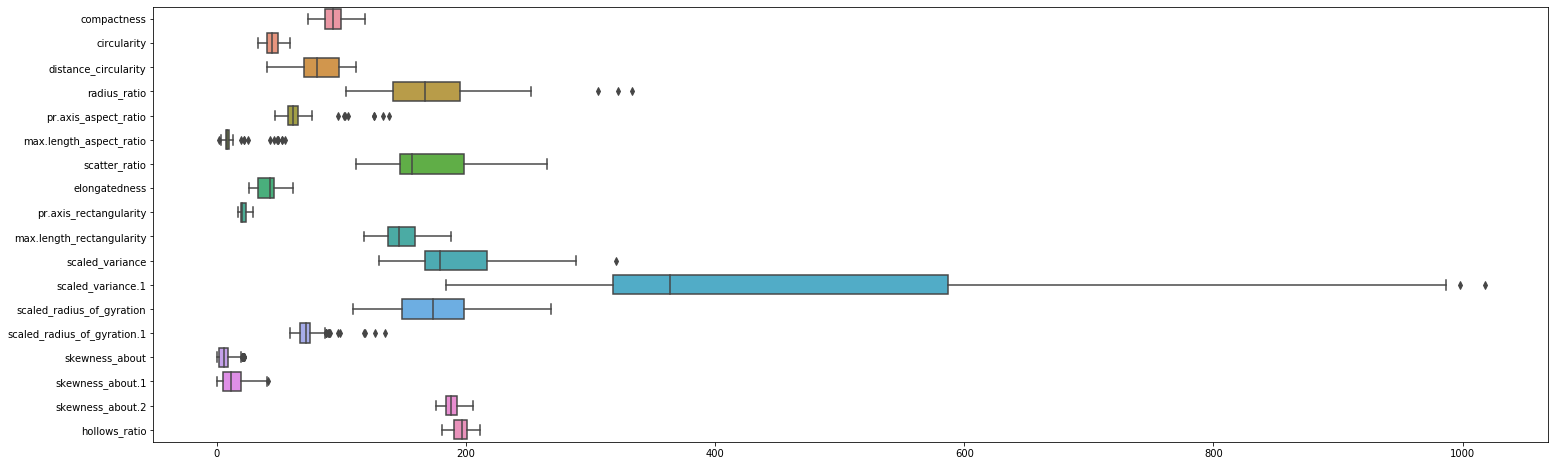

In [16]:
plt.figure(figsize=(25,8))
sns.boxplot(data = imp_x,orient = 'h') # Box plot to check how different variable are spread across

### Insights
- Variables are of different magnitude hence need to be normalized before performing a PCa to nullify any effect of single hig magnitude variable

In [17]:
df =imp_x.apply(zscore) # replacing the original values with z scores to normalize the data
df.head()

compactness  circularity  distance_circularity  radius_ratio  \
0     0.160580     0.518073              0.057177      0.273363   
1    -0.325470    -0.623732              0.120741     -0.835032   
2     1.254193     0.844303              1.519141      1.202018   
3    -0.082445    -0.623732             -0.006386     -0.295813   
4    -1.054545    -0.134387             -0.769150      1.082192   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0              1.310398                 0.311542      -0.207598   
1             -0.593753                 0.094079      -0.599423   
2              0.548738                 0.311542       1.148719   
3              0.167907                 0.094079      -0.750125   
4              5.245643                 9.444962      -0.599423   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0       0.136262               -0.224342                   0.758332   
1       0.520519               -0.610886                  -0.344578   
2      -1.144597                0.935290                   0.689401   
3       0.648605               -0.610886                  -0.344578   
4       0.520519               -0.610886                  -0.275646   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0        -0.401920          -0.341934                   0.285705   
1        -0.593357          -0.619724                  -0.513630   
2         1.097671           1.109379                   1.392477   
3        -0.912419          -0.738777                  -1.466683   
4         1.671982          -0.648070                   0.408680   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                    -0.327326       -0.073812          0.380870   
1                    -0.059384        0.538390          0.156798   
2                     0.074587        1.558727         -0.403383   
3                    -1.265121       -0.073812         -0.291347   
4                     7.309005        0.538390         -0.179311   

   skewness_about.2  hollows_ratio  
0         -0.312012       0.183957  
1          0.013265       0.452977  
2         -0.149374       0.049447  
3          1.639649       1.529056  
4         -1.450481      -1.699181

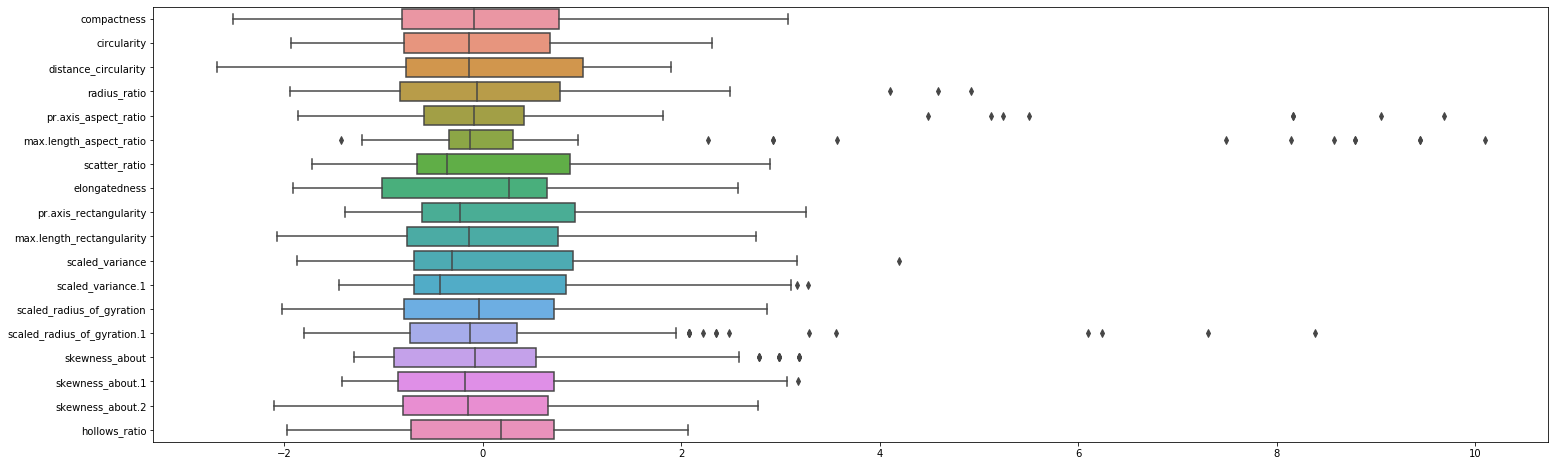

In [18]:
plt.figure(figsize=(25,8))
sns.boxplot(data = df,orient = 'h') # To Check how the data is normalized post transformation

### Insights
- All the variables are normalized now with same level of magnitude

In [19]:
# PCA
# Step 1 - Create covariance matrix
cov_matrix = np.cov(df.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.00118343  0.68569786  0.79086299  0.69055952  0.09164265  0.14842463
   0.81358214 -0.78968322  0.81465658  0.67694334  0.76297234  0.81497566
   0.58593517 -0.24988794  0.23635777  0.15720044  0.29889034  0.36598446]
 [ 0.68569786  1.00118343  0.79325751  0.6216467   0.15396023  0.25176438
   0.8489411  -0.82244387  0.84439802  0.96245572  0.79724837  0.83693508
   0.92691166  0.05200785  0.14436828 -0.01145212 -0.10455005  0.04640562]
 [ 0.79086299  0.79325751  1.00118343  0.76794246  0.15864319  0.26499957
   0.90614687 -0.9123854   0.89408198  0.77544391  0.86253904  0.88706577
   0.70660663 -0.22621115  0.1140589   0.26586088  0.14627113  0.33312625]
 [ 0.69055952  0.6216467   0.76794246  1.00118343  0.66423242  0.45058426
   0.73529816 -0.79041561  0.70922371  0.56962256  0.79435372  0.71928618
   0.53700678 -0.18061084  0.04877032  0.17394649  0.38266622  0.47186659]
 [ 0.09164265  0.15396023  0.15864319  0.66423242  1.00118343  0.64949139
   0.1038547

### Identify Eigen values

In [20]:
# Step 2- Get eigen values and eigen vector
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eig_vecs)
print('\n Eigen Values \n%s', eig_vals)

Eigen Vectors 
%s [[ 2.75283688e-01  1.26953763e-01 -1.19922479e-01  7.83843562e-02
   6.95178336e-02 -1.44875476e-01 -4.51862331e-01 -5.66136785e-01
  -4.84418105e-01 -2.60076393e-01  4.65342885e-02 -1.20344026e-02
  -1.56136836e-01 -1.00728764e-02 -6.00532537e-03  6.00485194e-02
  -6.50956666e-02 -9.67780251e-03]
 [ 2.93258469e-01 -1.25576727e-01 -2.48205467e-02  1.87337408e-01
  -8.50649539e-02  3.02731148e-01  2.49103387e-01 -1.79851809e-01
  -1.41569001e-02  9.80779086e-02  3.01323693e-03  2.13635088e-01
  -1.50116709e-02 -9.15939674e-03  7.38059396e-02 -4.26993118e-01
  -2.61244802e-01 -5.97862837e-01]
 [ 3.04609128e-01  7.29516436e-02 -5.60143254e-02 -7.12008427e-02
   4.06645651e-02  1.38405773e-01 -7.40350569e-02  4.34748988e-01
  -1.67572478e-01 -2.05031597e-01  7.06489498e-01 -3.46330345e-04
   2.37111452e-01  6.94599696e-03 -2.50791236e-02  1.46240270e-01
   7.82651714e-02 -1.57257142e-01]
 [ 2.67606877e-01  1.89634378e-01  2.75074211e-01 -4.26053415e-02
  -4.61473714e-02 -

In [21]:
tot = sum(eig_vals) 
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)] # get the % of variation explained by each principal component
cum_var_exp = np.cumsum(var_exp) # cummulative summation of variation
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 52.18603365  68.9158021   79.47844095  86.02590063  91.11576952
  94.11218252  96.10354875  97.33504945  98.22626473  98.73597943
  99.10498391  99.36357011  99.5621946   99.71430385  99.82849808
  99.92791726  99.98355026 100.        ]


Text(0, 0.5, 'Eigen value')

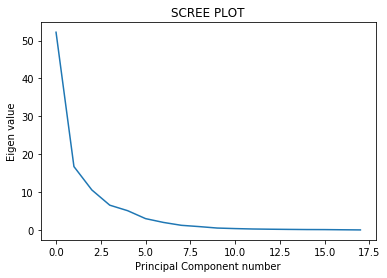

In [22]:
plt.plot(var_exp) 
plt.title('SCREE PLOT')
plt.xlabel('Principal Component number')
plt.ylabel('Eigen value')

### Insights
- Visually we can observe that their is steep drop in variance explained with increase in number of PC's. the elbow point comes around 3rd principal component. Since our goal is to choose principal components that together explain over 95% variance, lets plot the cummulative variance plot

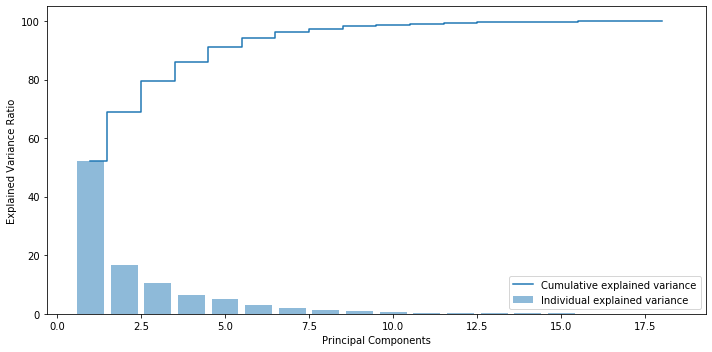

In [23]:
# Ploting 
plt.figure(figsize=(10 , 5))
plt.bar(range(1, eig_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eig_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

### Insights
- Upto 7th / 8th Principal component explain over 95% of the variation, lets take a conservative approach and go with top 8 principal components for building our SVM model

In [24]:
#we are generating only 7 PCA dimensions (dimensionality reduction from 18 to 8)
pca8 = PCA(n_components=8)
pca8.fit(df)
print(pca8.components_)
print(pca8.explained_variance_ratio_)
pca8 = pca8.transform(df)

[[ 2.75283688e-01  2.93258469e-01  3.04609128e-01  2.67606877e-01
   8.05039890e-02  9.72756855e-02  3.17092750e-01 -3.14133155e-01
   3.13959064e-01  2.82830900e-01  3.09280359e-01  3.13788457e-01
   2.72047492e-01 -2.08137692e-02  4.14555082e-02  5.82250207e-02
   3.02795063e-02  7.41453913e-02]
 [-1.26953763e-01  1.25576727e-01 -7.29516436e-02 -1.89634378e-01
  -1.22174860e-01  1.07482875e-02  4.81181371e-02  1.27498515e-02
   5.99352482e-02  1.16220532e-01  6.22806229e-02  5.37843596e-02
   2.09233172e-01  4.88525148e-01 -5.50899716e-02 -1.24085090e-01
  -5.40914775e-01 -5.40354258e-01]
 [-1.19922479e-01 -2.48205467e-02 -5.60143254e-02  2.75074211e-01
   6.42012966e-01  5.91801304e-01 -9.76283108e-02  5.76484384e-02
  -1.09512416e-01 -1.70641987e-02  5.63239801e-02 -1.08840729e-01
  -3.14636493e-02  2.86277015e-01 -1.15679354e-01 -7.52828901e-02
   8.73592034e-03  3.95242743e-02]
 [ 7.83843562e-02  1.87337408e-01 -7.12008427e-02 -4.26053415e-02
   3.27257119e-02  3.14147277e-02 -9.

In [25]:
df_pca = pd.DataFrame(pca8) # Principal components - top 8 components
df_pca.head()

0         1          2         3         4         5         6  \
0  0.334162 -0.219026   1.001584  0.176612  0.079301 -0.757447 -0.901124   
1 -1.591711 -0.420603  -0.369034  0.233234  0.693949 -0.517162  0.378637   
2  3.769324  0.195283   0.087859  1.202212  0.731732  0.705041 -0.034584   
3 -1.738598 -2.829692   0.109456  0.376685 -0.362897 -0.484431  0.470753   
4  0.558103  4.758422  11.703647  0.147464  3.256953 -0.203446  2.671578   

          7  
0 -0.381106  
1  0.247059  
2  0.482772  
3 -0.023086  
4 -0.448854

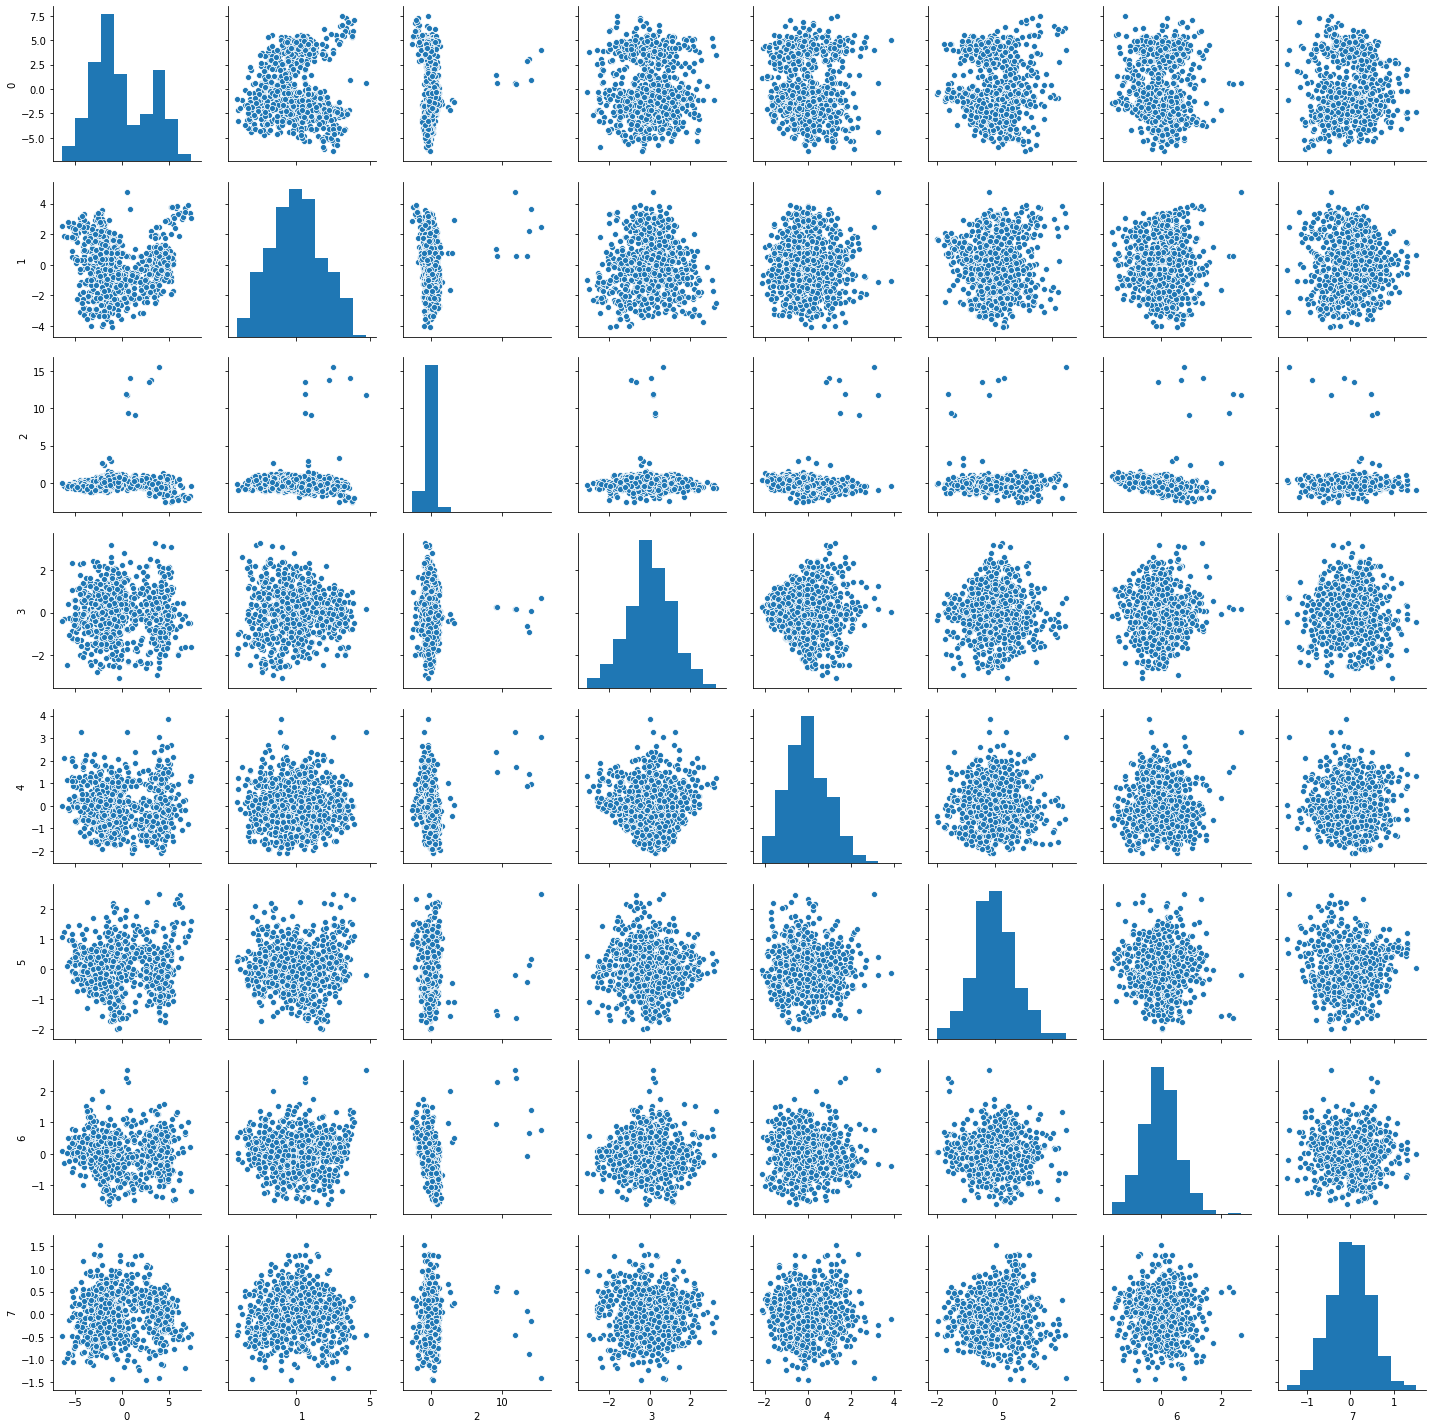

In [26]:
sns.pairplot(df_pca)

### Insights
- No correlation can be seen between any of the variables unlike the multicollinearity seen between the original variables

## 7.Building SVM model using 8 Principal components

In [27]:
# splitting the principal component data into test and training set
x_train_pca, x_test_pca, y_train_pca, y_test_pca = train_test_split(pca8, Y, test_size=0.3, random_state = 2)
clf_pca = svm.SVC(gamma=0.028, C=3, kernel = 'poly') # using Polynomial kernal as it gave an excellent accuracy with original data
mod_pca = clf_pca.fit(x_train_pca, y_train_pca)
print("The model accuracy in training set:{0:.4f}".format(mod_pca.score(x_train_pca, y_train_pca)))

The model accuracy in training set:0.7128


In [28]:
x_train_pca, x_test_pca, y_train_pca, y_test_pca = train_test_split(df_pca, Y, test_size=0.3, random_state = 2)
clf_pca = svm.SVC(gamma=0.028, C=3, kernel = 'rbf') 
mod_pca = clf_pca.fit(x_train_pca, y_train_pca)
print("The model accuracy in training set:{0:.4f}".format(mod_pca.score(x_train_pca, y_train_pca)))

The model accuracy in training set:0.9730


In [29]:
# Kfold Cross Validation
kfold = KFold(n_splits= 10, random_state=2)
model = svm.SVC(gamma=0.025, C=3, kernel = 'rbf') 
results = cross_val_score(model, df_pca,Y, cv=kfold)
print(results)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

[0.92941176 0.96470588 0.95294118 0.95294118 0.91764706 0.97647059
 0.92857143 0.9047619  0.95238095 0.97619048]
Accuracy: 94.560% (2.326%)


## 8. Insights on Model accuracy.
- The Principal components are spread entirely different from the original variables because of which the polynomial kernal that worked well in the original variables scored pathetically with the PCA data. Whereas the Radial Kernal which has a accuracy near equal to random accuracy is having a higher accuracy in models with top 8 principal components.
- The Average cross validation accuracy of 10 test sets are around 94.5% for 8 Principal components as against a 96% accuracy with 18 original independent variables 
- The standar deviation of 2.5% is same as that of the standard deviation  got through cross validation of moedl with 18 original independent variables. This conludes the model accuracy is not significantly affected by reducing the original variables to 8 principal components

### Confusion matrix, precision, accuracy, f1 score

The model accuracy in training set:1.0000
Model Accuracy in Test set: 0.9685
              precision    recall  f1-score   support

         bus       0.99      1.00      0.99        68
         car       1.00      0.93      0.97       120
         van       0.90      1.00      0.95        66

    accuracy                           0.97       254
   macro avg       0.96      0.98      0.97       254
weighted avg       0.97      0.97      0.97       254



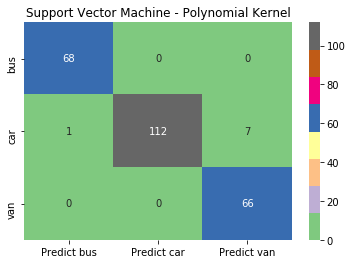

In [30]:
y_pred = clf_poly.predict(x_test)
print("The model accuracy in training set:{0:.4f}".format(mod.score(x_train, y_train)))
print("Model Accuracy in Test set: {0:.4f}".format(metrics.accuracy_score(y_test, y_pred)))
print(classification_report(y_test, y_pred))
cmsvm=metrics.confusion_matrix(y_test, y_pred, labels=["bus","car","van"])
df_svm = pd.DataFrame(cmsvm, index = [i for i in ["bus","car","van"]],
                  columns = [i for i in ["Predict bus","Predict car","Predict van"]])
ax1=sns.heatmap(df_svm, cmap="Accent", annot=True,fmt = '')
ax1.title.set_text('Support Vector Machine - Polynomial Kernel')

Model Accuracy in Test set: 0.9409
              precision    recall  f1-score   support

         bus       0.98      0.93      0.95        68
         car       0.95      0.93      0.94       120
         van       0.89      0.98      0.94        66

    accuracy                           0.94       254
   macro avg       0.94      0.95      0.94       254
weighted avg       0.94      0.94      0.94       254



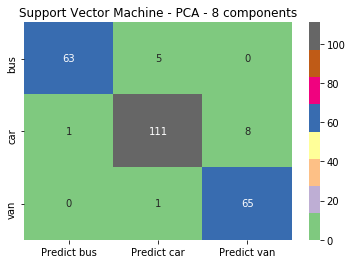

In [31]:
y_pred_pca = clf_pca.predict(x_test_pca)
print("Model Accuracy in Test set: {0:.4f}".format(metrics.accuracy_score(y_test_pca, y_pred_pca)))
print(classification_report(y_test_pca, y_pred_pca))
cmsvm_pca=metrics.confusion_matrix(y_test_pca, y_pred_pca, labels=["bus","car","van"])
df_svm_pca = pd.DataFrame(cmsvm_pca, index = [i for i in ["bus","car","van"]],
                  columns = [i for i in ["Predict bus","Predict car","Predict van"]])
ax1=sns.heatmap(df_svm_pca, cmap="Accent", annot=True,fmt = '')
ax1.title.set_text('Support Vector Machine - PCA - 8 components')

## Conclusion
- We build model with both original data set with 18 independent variables and reduced dataset with 8 principal components and compared the below metrics
    - __10 Fold cross validation average accuracy__
    - __10 Fold cross validation Standard deviation of accuracy__
    - __Precision__
    - __Recall__
    - __F1 Score__
    - __Confusion Matrix__
- We couldn't see any significant drop in any of the accuracy metrics. The difference is just between 1 - 1.5% in all the metrics mentiond above. Hence the PCA had done well in reducting the dimension by retaining the important elements without affecting the classification accuracy